<a href="https://colab.research.google.com/github/felipealencar/courses/blob/artificial-intelligence/artificial-intelligence/lec-03/fuzzy_gorjeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx==2.3
!pip install scikit-fuzzy

     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=53a2efbc1db0ce9237f2e4bcabbe9b043a81d0d04554d23c3dfbd5c255c038dc
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=4fcac7e623b0a2ba3cd59c8c0d710b1e6f53e38b1a68f384f03d4fa511

# Nova seção

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)
comida.automf(names=['péssima', 'comível', 'deliciosa'])


# Cria as funções de pertinência usando tipos variados
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5])
servico['aceitável'] = fuzz.gaussmf(servico.universe, 5, 2)
servico['excelente'] = fuzz.gaussmf(servico.universe, 10,3)

gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['média'] = fuzz.trapmf(gorjeta.universe, [0, 13,15, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [15, 25, 25])

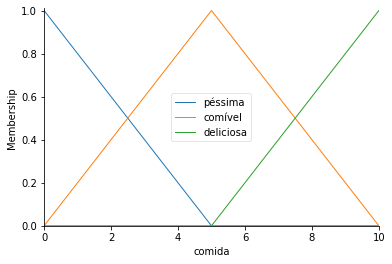

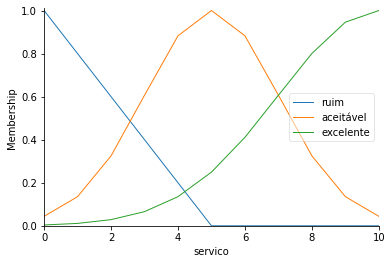

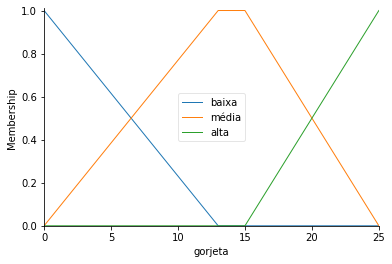

In [ ]:
comida.view()
servico.view()
gorjeta.view()

In [ ]:
rule1 = ctrl.Rule(servico['excelente'] | comida['deliciosa'], gorjeta['alta'])
rule2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
rule3 = ctrl.Rule(servico['ruim'] & comida['péssima'], gorjeta['baixa'])

In [ ]:
gorjeta_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)

# Entrando com alguns valores para qualidade da comida e do serviço
gorjeta_simulador.input['comida'] = 3.5
gorjeta_simulador.input['servico'] = 9.4

# Computando o resultado
gorjeta_simulador.compute()
print(gorjeta_simulador.output['gorjeta'])

18.57604101547121


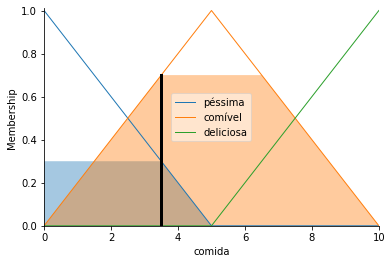

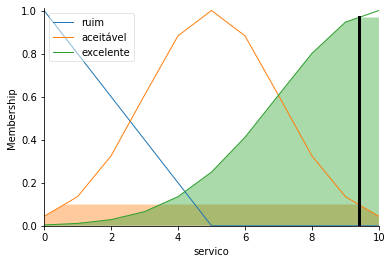

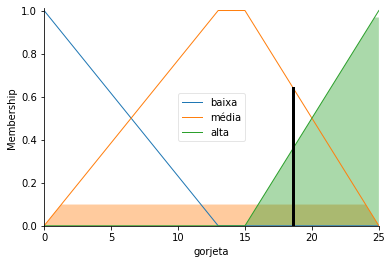

In [ ]:
comida.view(sim=gorjeta_simulador)
servico.view(sim=gorjeta_simulador)
gorjeta.view(sim=gorjeta_simulador)